In [ ]:
import tensorflow as tf
import sklearn
import zipfile, os
from sklearn import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!pip3 install split-folders tqdm #install splitfolders and tqdm

In [ ]:
#downloading the file
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip / -O /tmp/rockpaperscissor.zip


--2021-06-02 07:44:42--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissor.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  13.6MB/s    in 23s     

2021-06-02 07:45:05 (13.4 MB/s) - ‘/tmp/rockpaperscissor.zip’ saved [322873683/322873683]

/: Scheme missing.
FINISHED --2021-06-02 07:45:05--
Total wall clock time: 23s
Downloaded: 1 files, 308M in 23s (13.4 MB/s)


In [ ]:
import zipfile, os

existing_zip = '/tmp/rockpaperscissor.zip'
base_zip = zipfile.ZipFile(existing_zip, 'r') #read the file
base_zip.extractall('/tmp') #extracting all the contents
base_zip.close()

In [ ]:
os.listdir('/tmp/rockpaperscissors') #see whats in it

['scissors', 'paper', 'rock', 'README_rpc-cv-images.txt', 'rps-cv-images']

In [ ]:
import splitfolders 

path_dir = '/tmp/rockpaperscissors/rps-cv-images'
splitfolders.ratio(path_dir, output = '/tmp/rockpaperscissors', seed=1337, ratio=(.6, .4)) #split 60:40

train_dir = os.path.join('/tmp/rockpaperscissors', 'train') #putting track to the directory
test_dir = os.path.join('/tmp/rockpaperscissors', 'val')

Copying files: 2188 files [00:00, 3546.75 files/s]


In [ ]:
#splitting 3 different classes

rock_class = os.path.join(path_dir, 'rock')
paper_class = os.path.join(path_dir, 'paper')
scissors_class = os.path.join(path_dir, 'scissors')

In [ ]:
#modelling the train test

train_rock_class, test_rock_class = train_test_split(os.listdir(rock_class), test_size=0.4, train_size=0.6)
train_paper_class, test_paper_class = train_test_split(os.listdir(paper_class), test_size=0.4, train_size=0.6)
train_scissors_class, test_scissors_class = train_test_split(os.listdir(scissors_class), test_size=0.4, train_size=0.6)

In [ ]:
#splitting 3 different classes into 2 different sets, that is 60% training sets and 40% testing sets

train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
test_rock = os.path.join(test_dir, 'rock')
test_paper = os.path.join(test_dir, 'paper')
test_scissors = os.path.join(test_dir, 'scissors')

In [ ]:
#modelling the tensorflow to read images

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range=0.2,
                    fill_mode='nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range=0.2,
                    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
#using input, hidden, and output layers

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.optimizers.Adam(), #using adam optimizer to be more accurate
              metrics=['accuracy'])

In [ ]:
#doing the training with epochs, that is the back and forth model

trial = model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=test_generator,
    validation_steps=5,
    verbose=2)

Epoch 1/20
25/25 - 48s - loss: 1.0791 - accuracy: 0.4300 - val_loss: 0.8492 - val_accuracy: 0.5312
Epoch 2/20
25/25 - 46s - loss: 0.6297 - accuracy: 0.7425 - val_loss: 0.4706 - val_accuracy: 0.8000
Epoch 3/20
25/25 - 46s - loss: 0.3762 - accuracy: 0.8625 - val_loss: 0.3247 - val_accuracy: 0.8875
Epoch 4/20
25/25 - 46s - loss: 0.2835 - accuracy: 0.9050 - val_loss: 0.2843 - val_accuracy: 0.8813
Epoch 5/20
25/25 - 46s - loss: 0.2247 - accuracy: 0.9200 - val_loss: 0.2362 - val_accuracy: 0.9375
Epoch 6/20
25/25 - 46s - loss: 0.1917 - accuracy: 0.9325 - val_loss: 0.2240 - val_accuracy: 0.9125
Epoch 7/20
25/25 - 50s - loss: 0.1914 - accuracy: 0.9375 - val_loss: 0.2311 - val_accuracy: 0.9000
Epoch 8/20
25/25 - 46s - loss: 0.1316 - accuracy: 0.9613 - val_loss: 0.2552 - val_accuracy: 0.9062
Epoch 9/20
25/25 - 48s - loss: 0.1654 - accuracy: 0.9388 - val_loss: 0.2216 - val_accuracy: 0.9375
Epoch 10/20
25/25 - 46s - loss: 0.1285 - accuracy: 0.9588 - val_loss: 0.0734 - val_accuracy: 0.9688
Epoch 11/

Saving should be paper.jpg to should be paper.jpg


Menampilkan hasil untuk:  should be paper.jpg
Kertas


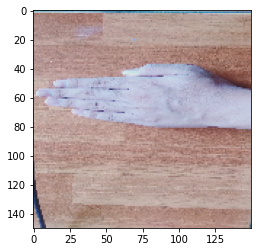

In [ ]:
from google.colab import files
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  print('\n')
  print('Menampilkan hasil untuk: ', fn)

  if classes[0, 0]!=0:
    print('Kertas')
  elif classes[0, 1]!=0:
    print('Batu')
  else:
    print('Gunting')